In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use("seaborn-v0_8-darkgrid")
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data=pd.read_csv('column_3C_weka.csv')

In [3]:
data.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


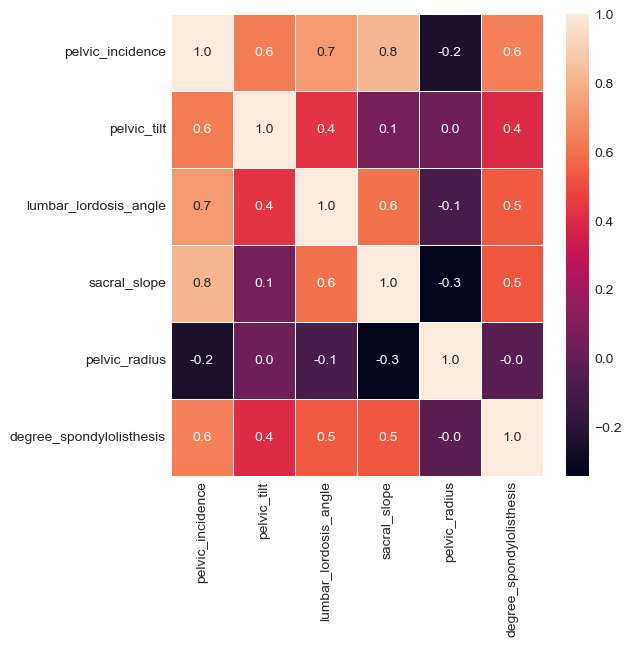

In [4]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f',ax=ax,)
plt.show()


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


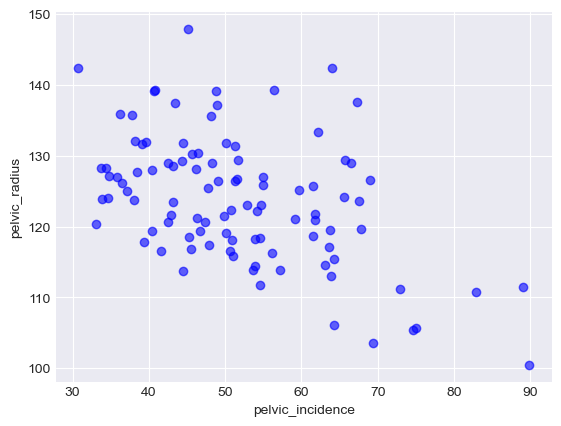

In [6]:
plt.scatter(data.pelvic_incidence[data["class"]=="Abnormal"],data.pelvic_radius[data["class"]=="Abnormal"],color="red",alpha=0.6)
plt.scatter(data.pelvic_incidence[data["class"]=="Normal"],data.pelvic_radius[data["class"]=="Normal"],color="blue",alpha=0.6)
plt.xlabel("pelvic_incidence")
plt.ylabel("pelvic_radius")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


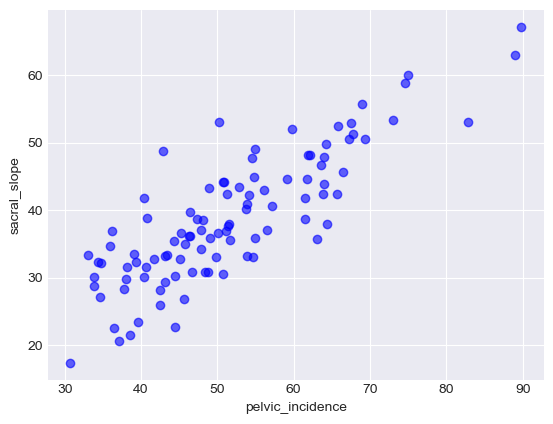

In [7]:
plt.scatter(data.pelvic_incidence[data["class"]=="Abnormal"],data.sacral_slope[data["class"]=="Abnormal"],color="red",alpha=0.6)
plt.scatter(data.pelvic_incidence[data["class"]=="Normal"],data.sacral_slope[data["class"]=="Normal"],color="blue",alpha=0.6)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


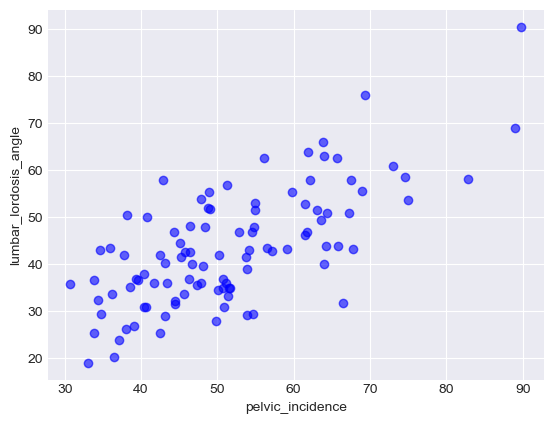

In [8]:
plt.scatter(data.pelvic_incidence[data["class"]=="Abnormal"],data.lumbar_lordosis_angle[data["class"]=="Abnormal"],color="red",alpha=0.6)
plt.scatter(data.pelvic_incidence[data["class"]=="Normal"],data.lumbar_lordosis_angle[data["class"]=="Normal"],color="blue",alpha=0.6)
plt.xlabel("pelvic_incidence")
plt.ylabel("lumbar_lordosis_angle")
plt.legend()
plt.show()

In [9]:
data["class"]=[0 if each=="Normal" else 1 for each in data["class"]]

In [10]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [11]:
x = data.drop("class",axis=1)
y = data["class"].astype("int64")

In [12]:
x.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [14]:
train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.3,random_state=1)

In [15]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(217, 6)
(217,)
(93, 6)
(93,)


In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.score(test_x,test_y)

0.8602150537634409

For finding best n_neighbors hyperparameter in between 1 and 20

In [18]:
scores=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    scores.append(knn.score(test_x,test_y))

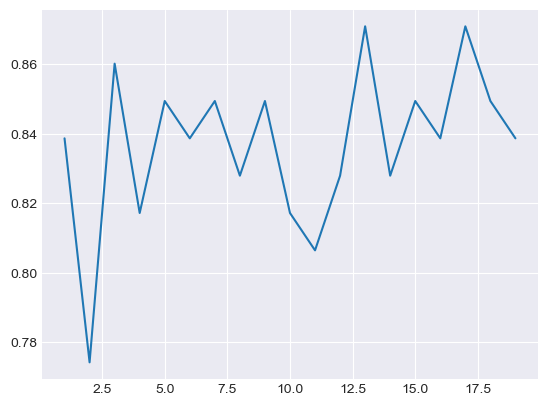

In [19]:
plt.plot(range(1,20),scores)
plt.show()

In [20]:
print("best score is ",max(scores)," at ",scores.index(max(scores)))

best score is  0.8709677419354839  at  12
